In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from scipy.stats import kstest, kruskal

from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [147]:
INPUT_PATH = '../data/CORK_STOPPERS1.csv'
data = pd.read_csv(INPUT_PATH, delimiter=",")

display(data)

,N,C,ART,N.1,PRT,ARM,PRM,ARTG,NG,PRTG,RAAR,RAN
0,1,1,81,41,250,"1,980","6,100","9,000",1,"12,000","11,110","2,440"
1,2,1,80,42,238,"1,910","5,670","0,000",0,"0,000","0,000","0,000"
2,3,1,81,26,196,"3,120","7,540","9,800",2,"15,000","12,040","6,730"
3,4,1,125,63,368,"1,980","5,840","20,000",1,"18,000","16,000","1,590"
4,5,1,146,45,350,"3,240","7,780","42,800",3,"43,000","29,280","6,110"
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,3,566,83,1024,"6,820","12,340","342,000",13,"278,000","60,420","15,660"
146,147,3,436,121,1090,"3,600","9,010","254,000",12,"234,000","58,260","9,920"
147,148,3,481,95,982,"5,060","10,340","218,000",6,"180,000","45,320","6,320"
148,149,3,474,93,1014,"5,100","10,900","204,000",7,"158,000","43,040","7,530"


In [148]:
df = data.copy()
target = data['C'].copy()
df.drop(['C'], axis=1, inplace=True)

for col in df.columns:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

display(df.head())
display(target)

,N,ART,N.1,PRT,ARM,PRM,ARTG,NG,PRTG,RAAR,RAN
0,1.0,81.0,41.0,250.0,1.98,6.10,9.0,1.0,12.0,11.11,2.44
1,2.0,80.0,42.0,238.0,1.91,5.67,0.0,0.0,0.0,0.00,0.00
2,3.0,81.0,26.0,196.0,3.12,7.54,9.8,2.0,15.0,12.04,6.73
3,4.0,125.0,63.0,368.0,1.98,5.84,20.0,1.0,18.0,16.00,1.59
4,5.0,146.0,45.0,350.0,3.24,7.78,42.8,3.0,43.0,29.28,6.11


0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: C, Length: 150, dtype: int64

In [130]:
#df = data.apply(pd.to_numeric, errors='coerce')
#df = df.astype(float)
#df.drop(['C'], axis=1, inplace=True)
#df.drop(['NG'], axis=1, inplace=True)
#
#mapping = {'p': 1, 'm': 2, 'S': 3}
#target = data['C']
#target = target.map(mapping)
#
#display(df.head())
#display(data.head())
#display(target)

In [177]:
df.isna().sum()

N       0
ART     0
N.1     0
PRT     0
ARM     0
PRM     0
ARTG    0
NG      0
PRTG    0
RAAR    0
RAN     0
dtype: int64

In [184]:
rank = [ (feature, kruskal(df[feature], target)[0]) for feature in df.columns ]
rank.sort(key=lambda x: x[1], reverse=True)

print("K-W Feature ranking:\n" + "\n".join(f"{feature:<10} | {h_stat:.2f}" for feature, h_stat in rank))

K-W Feature ranking:
N.1        | 227.42
PRT        | 227.41
ART        | 227.41
PRM        | 227.41
N          | 218.59
PRTG       | 129.93
ARTG       | 122.33
RAAR       | 120.84
ARM        | 115.75
RAN        | 67.44
NG         | 31.59


In [187]:
for column_name in df.columns:
    grouped_data = [group[column_name].values for name, group in df.groupby(column_name)]

    statistic, p_value = kruskal(*grouped_data)

    print("Feature:", column_name)
    print("Kruskal-Wallis H statistic:", statistic)
    print("p-value:", p_value)
    print()

Feature: N
Kruskal-Wallis H statistic: 149.0
p-value: 0.48459214839286363

Feature: ART
Kruskal-Wallis H statistic: 149.00000000000003
p-value: 0.16237866984283622

Feature: N.1
Kruskal-Wallis H statistic: 148.99999999999994
p-value: 3.8692551756972064e-07

Feature: PRT
Kruskal-Wallis H statistic: 149.0
p-value: 0.10989925016083377

Feature: ARM
Kruskal-Wallis H statistic: 148.99999999999997
p-value: 0.07920294860700837

Feature: PRM
Kruskal-Wallis H statistic: 149.0
p-value: 0.19366480293521426

Feature: ARTG
Kruskal-Wallis H statistic: 149.00000000000006
p-value: 0.0008677512542934755

Feature: NG
Kruskal-Wallis H statistic: 148.99999999999994
p-value: 9.766508170170116e-22

Feature: PRTG
Kruskal-Wallis H statistic: 149.00000000000006
p-value: 0.0002041791684247136

Feature: RAAR
Kruskal-Wallis H statistic: 149.00000000000003
p-value: 0.1098992501608335

Feature: RAN
Kruskal-Wallis H statistic: 149.00000000000003
p-value: 0.024447733388687658



In [189]:
error = {
    '       f1_score': [],
    ' accuracy_score': [],
    '   recall_score': [],
    'precision_score': [],
}

X = df[['ART', 'PRM']]

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2,  stratify=target)
for i in range(1, 30):

    scaler =  StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train, y_train)
    predictions = knc.predict(X_test)
    
    error["       f1_score"].append(f1_score(predictions, y_test, average='micro'))
    error[" accuracy_score"].append(accuracy_score(predictions, y_test))
    error["   recall_score"].append(recall_score(predictions, y_test, average='micro'))
    error["precision_score"].append(precision_score(predictions, y_test, average='micro'))

error = pd.DataFrame(error, columns=error.keys())
display(error)

,f1_score,accuracy_score,recall_score,precision_score
0,0.866667,0.866667,0.866667,0.866667
1,0.900000,0.900000,0.900000,0.900000
2,0.966667,0.966667,0.966667,0.966667
3,0.900000,0.900000,0.900000,0.900000
4,0.966667,0.966667,0.966667,0.966667
5,0.933333,0.933333,0.933333,0.933333
6,0.933333,0.933333,0.933333,0.933333
7,0.933333,0.933333,0.933333,0.933333
8,0.933333,0.933333,0.933333,0.933333
9,0.933333,0.933333,0.933333,0.933333


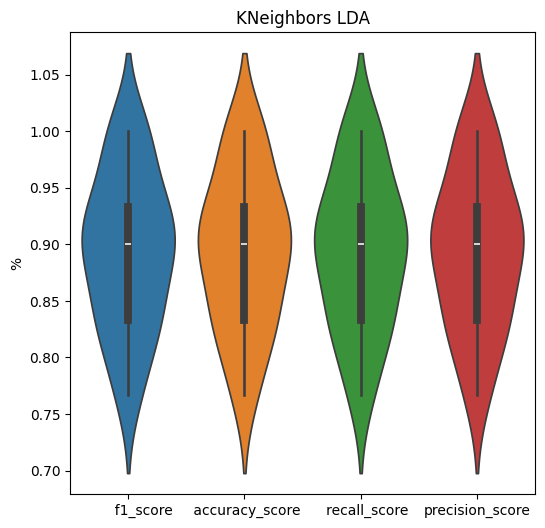

In [145]:
plt.figure(figsize=(6,6))

sb.violinplot(error)

plt.title("KNeighbors LDA")
plt.ylabel("%")
# plt.ylim(0,1)
plt.show()

# ROC Curves

a)
começa no (1, 1) porque começa com especificidade a 1 e sensibilidade a 0.

Ou seja, começo com um threshold muito abaixo/acima e classifico tudo com a mesmo classe.
À medida que o treshould sobe, o classificador vais alterando a especificidade até a especificidade 0 e sensibilidade 1.
Ou seja, o threshold fica muito acima/abaixo e classifico tudo com a classe inversa.

Para escolher o melhor treshold escolhemos de forma heuristica: o mais proximo ao valor (1, 0), por exemplo.


In [38]:
%pip install openpyxl

ERROR: Invalid requirement: 'openpyxl,'
Note: you may need to restart the kernel to use updated packages.


In [39]:
%pip install xlrd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 1.7 MB/s eta 0:00:002.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


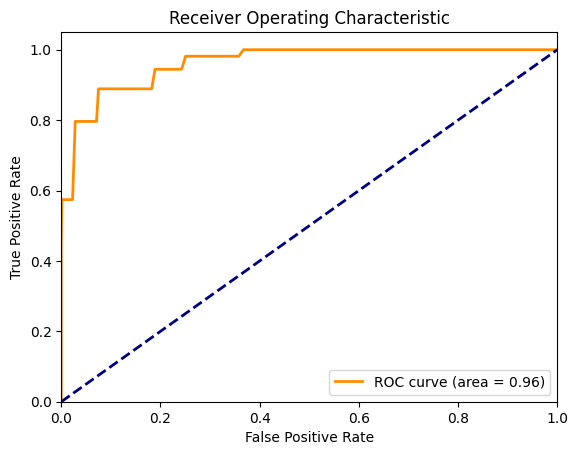

In [33]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(data['Correct Detections'], data['Noise'])

# Calcule a área sob a Curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plote a Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [114]:
import pandas as pd

df = pd.read_excel('../data/SIGNAL_NOISE.XLS', sheet_name=1)
df = df.iloc[1:101]

df.head()

,normal,noise (qui.square),occurrence times (Poisson),normal.1,signal (amp),Gain,signal w/ gain,signal+noise,threshold,Detections,Correct detections,Unnamed: 11,Unnamed: 12
1,-0.300232,0.090139,4.0,-0.822095,0.675839,4.0,NaN,0.090139,1.0,0,0,NaN,NaN
2,-1.277683,1.632474,10.0,0.039139,0.001532,NaN,NaN,1.632474,NaN,1,0,NaN,NaN
3,0.244257,0.059662,8.0,0.614298,0.377362,NaN,NaN,0.059662,NaN,0,0,NaN,NaN
4,1.276474,1.629385,5.0,-0.657848,0.432764,NaN,2.703358,4.332742,NaN,1,1,NaN,NaN
5,1.198350,1.436043,16.0,1.068788,1.142308,NaN,NaN,1.436043,NaN,1,0,NaN,NaN


In [115]:
df['signal+noise'] = df['signal+noise'].astype(float)
df['Correct detections'] = df['Correct detections'].astype(int)

<Axes: >

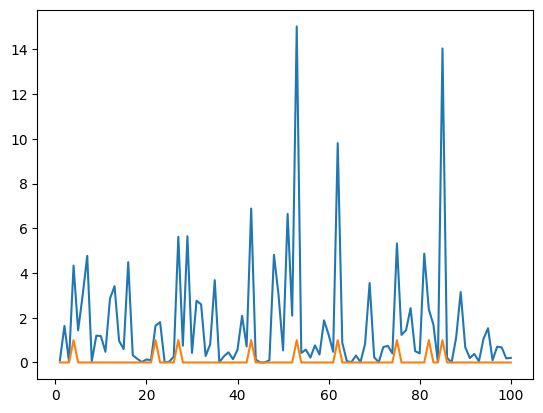

In [116]:
df['signal+noise'].plot()
df['Correct detections'].plot()

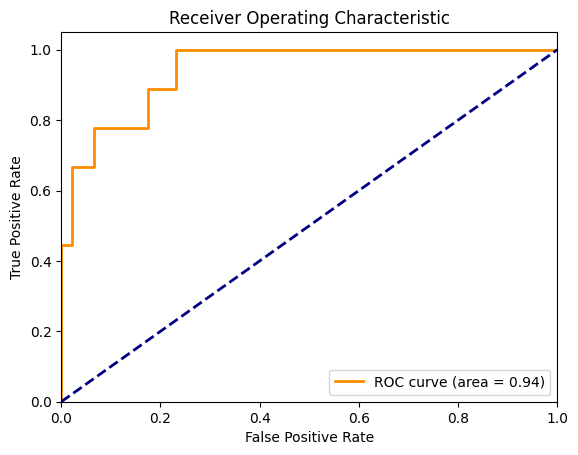

In [117]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df['Correct detections'], df['signal+noise'])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [139]:
import pandas as pd

df = pd.read_excel('../data/CORK_STOPPERS.XLS', sheet_name=1)
df = df[1:100]
df.loc[df['C'] == 1, 'C'] = 0
df.loc[df['C'] == 2, 'C'] = 1

display(df.head())
display(df['C'].dtype)
display(df['PRT'].dtype)
for col in df.columns:
    display(df[col].dtype)

,N,C,ART,N.1,PRT,ARM,PRM,ARTG,NG,PRTG,RAAR,RAN
1,1.0,0.0,81.0,41.0,250.0,1.98,6.10,9.0,1.0,12.0,11.11,2.44
2,2.0,0.0,80.0,42.0,238.0,1.91,5.67,0.0,0.0,0.0,0.00,0.00
3,3.0,0.0,81.0,26.0,196.0,3.12,7.54,9.8,1.8,15.0,12.04,6.73
4,4.0,0.0,125.0,63.0,368.0,1.98,5.84,20.0,1.0,18.0,16.00,1.59
5,5.0,0.0,146.0,45.0,350.0,3.24,7.78,42.8,2.8,43.0,29.28,6.11


dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

dtype('float64')

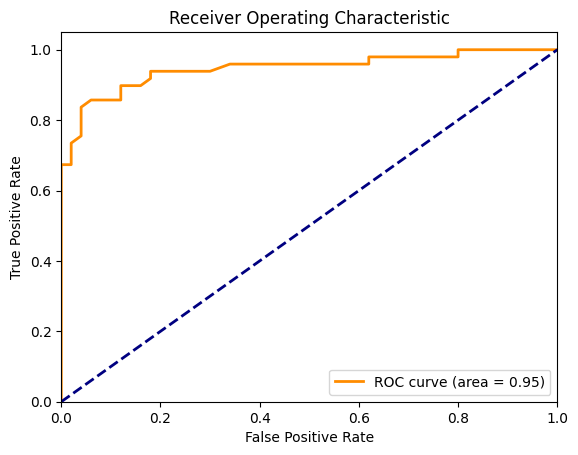

In [140]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df['C'], df['ART'])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()